In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv('data/transactions.csv')
print("Transaction Dataset:")
df


Transaction Dataset:


,transaction_id,sender_id,receiver_id,amount,date,location
0,1,101,202,5000,2025-01-01,New York
1,2,102,203,20000,2025-01-02,Los Angeles
2,3,103,204,1500,2025-01-03,San Francisco
3,4,104,205,30000,2025-01-04,Houston
4,5,105,206,400,2025-01-05,Chicago


In [26]:
suspicious = df[df['amount'] > 10000]
print("\nSuspicious Transactions:")
suspicious



Suspicious Transactions:


,transaction_id,sender_id,receiver_id,amount,date,location
1,2,102,203,20000,2025-01-02,Los Angeles
3,4,104,205,30000,2025-01-04,Houston


## Bar Chart: Transaction Amounts

The bar chart below shows transaction amounts. Suspicious transactions
(amount > $10,000) are highlighted in red.


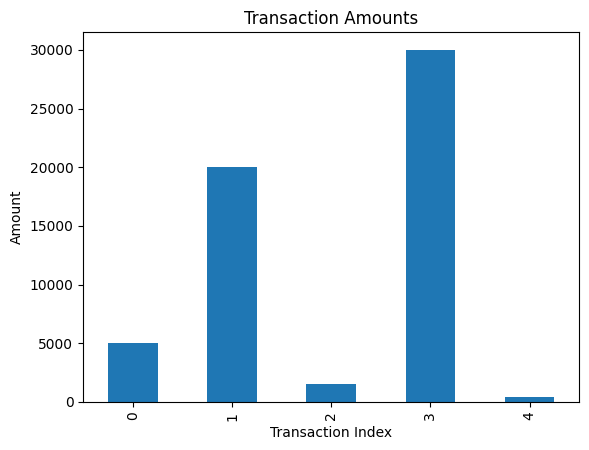

In [27]:
# Bar chart of transaction amounts
df['amount'].plot(kind='bar')
plt.title("Transaction Amounts")
plt.xlabel("Transaction Index")
plt.ylabel("Amount")
plt.show()


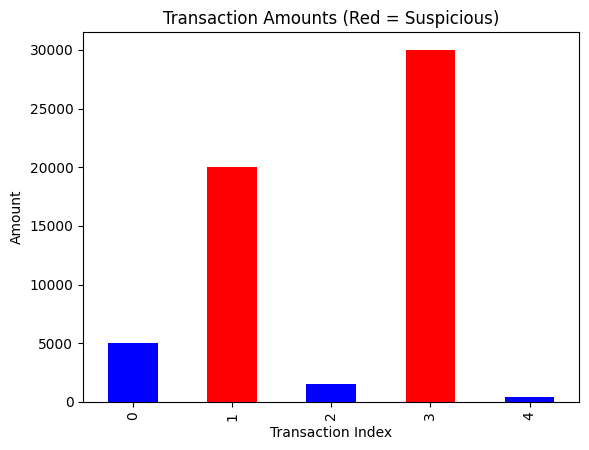

In [28]:
# Color-code bars based on whether the transaction is suspicious
colors = ['red' if amount > 10000 else 'blue' for amount in df['amount']]

# Plot bar chart with custom colors
df['amount'].plot(kind='bar', color=colors)
plt.title("Transaction Amounts (Red = Suspicious)")
plt.xlabel("Transaction Index")
plt.ylabel("Amount")
plt.show()


## Suspicious Transaction Proportions

The pie chart below shows the proportion of suspicious transactions compared to non-suspicious ones.


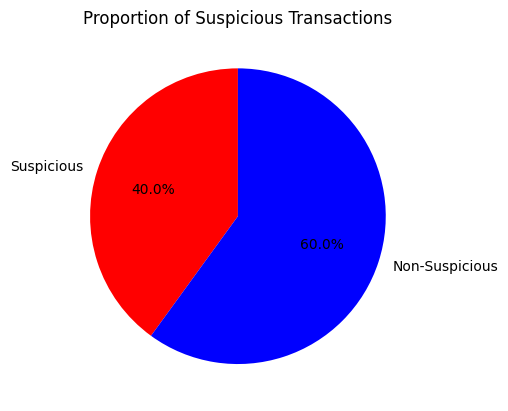

In [29]:
# Calculates proportions
suspicious_count = len(suspicious)
non_suspicious_count = len(df) - suspicious_count

# Creates pie chart
labels = ['Suspicious', 'Non-Suspicious']
sizes = [suspicious_count, non_suspicious_count]
colors = ['red', 'blue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title("Proportion of Suspicious Transactions")
plt.show()


In [30]:
# Saves the bar chart
plt.savefig('transaction_amounts_chart.png')

# Save the pie chart
plt.savefig('suspicious_transactions_pie_chart.png')


<Figure size 640x480 with 0 Axes>

In [31]:
from sklearn.ensemble import IsolationForest

# Train an anomaly detection model
model = IsolationForest(random_state=42)
df['anomaly'] = model.fit_predict(df[['amount']])

# Display anomalies
anomalies = df[df['anomaly'] == -1]
print("Anomalous Transactions:")
anomalies


Anomalous Transactions:


,transaction_id,sender_id,receiver_id,amount,date,location,anomaly
1,2,102,203,20000,2025-01-02,Los Angeles,-1
3,4,104,205,30000,2025-01-04,Houston,-1


## Trends over time 

Uses line chart to analyze transaction trends by date

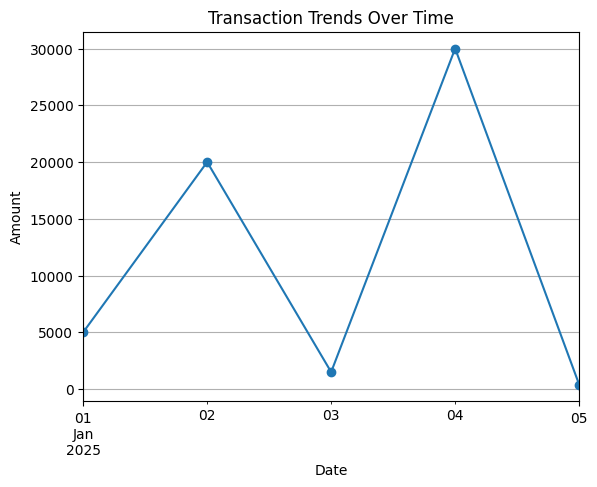

In [32]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df['amount'].plot(kind='line', marker='o')
plt.title("Transaction Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Amount")
plt.grid()
plt.show()

## Adds Transaction Volume by Location:

Show which locations have the most transactions using a bar chart.

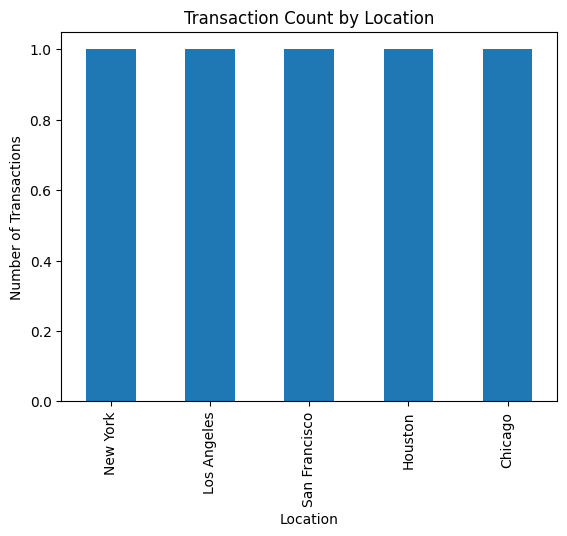

In [33]:
location_counts = df['location'].value_counts()
location_counts.plot(kind='bar')
plt.title("Transaction Count by Location")
plt.xlabel("Location")
plt.ylabel("Number of Transactions")
plt.show()


## Suspicious Patterns by Sender/Receiver

Identifies the sender or receivers ID that appears most often in suspicious transactions. 

In [34]:
suspicious_senders = suspicious['sender_id'].value_counts()
print("Top Suspicious Senders:")
print(suspicious_senders)

Top Suspicious Senders:
sender_id
102    1
104    1
Name: count, dtype: int64


## Statistical Summary

In [35]:
print("Summary Statistics:")
print(df['amount'].describe())


Summary Statistics:
count        5.000000
mean     11380.000000
std      13037.331015
min        400.000000
25%       1500.000000
50%       5000.000000
75%      20000.000000
max      30000.000000
Name: amount, dtype: float64


## Database Integration

Saves dataset to an SQLite database

In [36]:
import sqlite3

conn = sqlite3.connect('transactions.db')
df.to_sql('transactions', conn, if_exists='replace', index=False)


5

In [37]:
query = "SELECT * FROM transactions WHERE amount > 10000"
result = pd.read_sql(query, conn)
print(result)


   transaction_id  sender_id  receiver_id  amount     location  anomaly
0               2        102          203   20000  Los Angeles       -1
1               4        104          205   30000      Houston       -1


## Machine Learning 

In [38]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(random_state=42)
df['anomaly_score'] = model.fit_predict(df[['amount']])

# Display anomalies
anomalies = df[df['anomaly_score'] == -1]
print("Anomalous Transactions:")
print(anomalies)


Anomalous Transactions:
            transaction_id  sender_id  receiver_id  amount     location  \
date                                                                      
2025-01-02               2        102          203   20000  Los Angeles   
2025-01-04               4        104          205   30000      Houston   

            anomaly  anomaly_score  
date                                
2025-01-02       -1             -1  
2025-01-04       -1             -1  
